In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-23 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.1
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

---

# Wave Deconvolution - Multiplication and Addition

* So a complex wave is made of simple waves.
* How can you break a complex wave into it's simple component waves?

### Answer: Multiplying a wave by another wave of frequency 100Hz cancels out all of the other component waves and leaves only the 100Hz component (kind of).

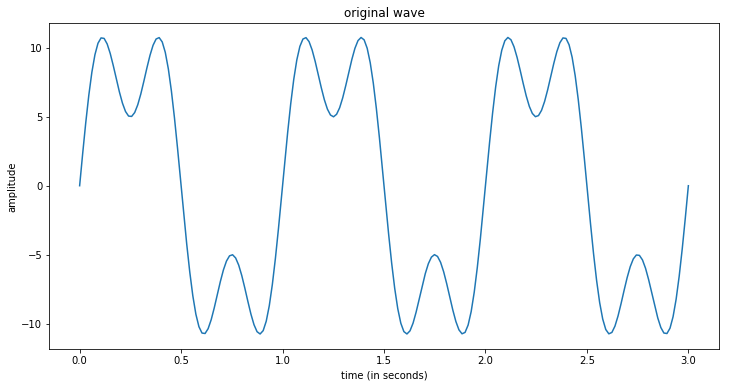

In [3]:
t = np.linspace(0, 3, 200)
freq_1hz_amp_10 = 10 * np.sin(1 * 2*np.pi*t)
freq_3hz_amp_5 =   5 * np.sin(3 * 2*np.pi*t)
complex_wave = freq_1hz_amp_10 + freq_3hz_amp_5

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='original wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave)

# Multiply complex wave by 1Hz wave

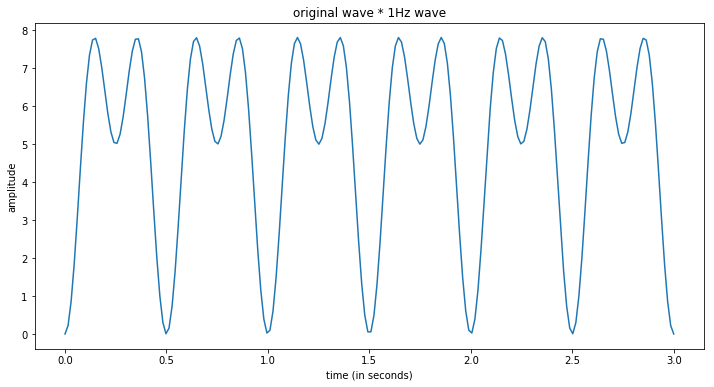

In [4]:
freq_1hz = np.sin(1 * 2*np.pi*t)
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='original wave * 1Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_1hz)

In [5]:
sum(complex_wave*freq_1hz)

994.9999999999999

In [6]:
print("Amplitude of 1hz component: ", sum(complex_wave*freq_1hz) * 2.0 * 1.0/len(complex_wave))

Amplitude of 1hz component:  9.95


# Multiply complex wave by 3Hz wave

Notice that more of the graph is above the x-axis then below it.

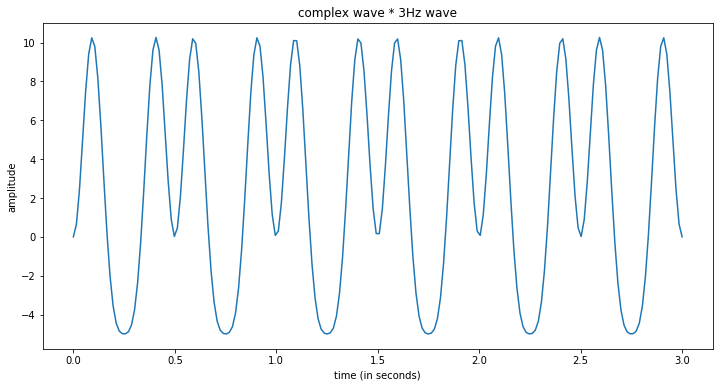

In [7]:
freq_3hz = np.sin(3 * 2*np.pi*t)
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='complex wave * 3Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_3hz)

In [8]:
sum(complex_wave*freq_3hz)

497.5

In [9]:
print("Amplitude of 3hz component: ", sum(complex_wave*freq_3hz) * 2.0/len(complex_wave))

Amplitude of 3hz component:  4.975


# Multiply complex wave by 2Hz wave

Notice that an equal amount of the graph is above the x-axis as below it.

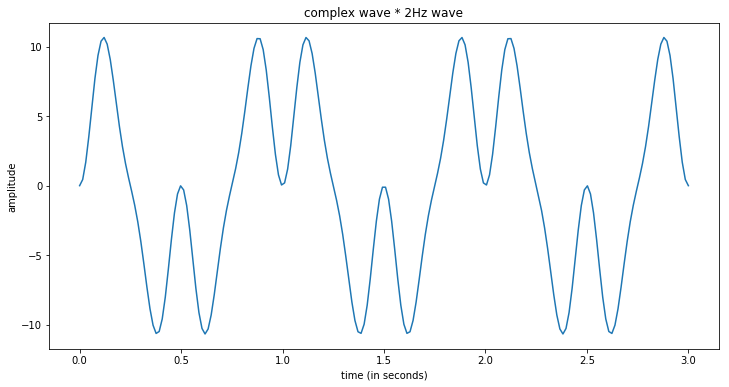

In [10]:
freq_2hz = np.sin(2 * 2*np.pi*t) 
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='complex wave * 2Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_2hz)

In [11]:
sum(complex_wave*freq_2hz)

1.0974554598419675e-13

In [12]:
# Very close to 0
print("Amplitude of 3hz component: ", sum(complex_wave*freq_2hz) * 2.0/len(complex_wave))

Amplitude of 3hz component:  1.0974554598419674e-15


In [13]:
# Same with 4Hz - close to 0
freq_4hz = np.sin(4 * 2*np.pi*t) 
sum(complex_wave*freq_4hz)

-7.216449660063512e-14

# So how does this work?

The summation of complex wave multiplied by simple wave of a given frequency leaves us with the "power" of that simple wave.